In [4]:
# import the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
import missingno as msno
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower, TTestPower

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
#load data
historical_transactions = pd.read_csv('historical_transactions.csv')
merchants = pd.read_csv('merchants.csv')
new_merchant_transactions = pd.read_csv('new_merchant_transactions.csv')
userscore = pd.read_csv('userscore.csv')

In [6]:
#concatting the tables(historical_transactions,new_merchant_transactions)
result=pd.concat([historical_transactions,new_merchant_transactions])
result.shape

(31075392, 14)

In [4]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31075392 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.5+ GB


In [7]:
#merging the result table with merchants table
result2 = pd.merge(result, merchants, on=["merchant_id","city_id","category_1","subsector_id","merchant_category_id","category_2","state_id"], how="inner")
result2

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
1,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.741649,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
3,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.745405,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.737892,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20289039,Y,C_ID_cf615e2bb8,296,N,0,A,68,M_ID_16a7d71c54,2,-0.686802,...,1.20,1.055556,3,2.20,1.527778,6,2.10,1.638889,12,N
20289040,Y,C_ID_2747b3a8ec,212,N,-1,NaN,34,M_ID_d1f0c32fe8,1,-0.228493,...,1.69,1.333333,3,2.67,2.333333,6,3.03,2.555556,12,Y
20289041,Y,C_ID_729db768e1,261,N,0,A,273,M_ID_7ebe45f784,2,-0.731881,...,0.49,0.727273,3,0.52,0.606061,6,0.48,0.621212,12,N
20289042,Y,C_ID_09f3c45b34,296,N,0,A,278,M_ID_ca64cb9e56,2,-0.671925,...,1.07,0.904762,3,1.23,1.007937,6,1.30,1.075397,12,N


In [8]:
#virtualize the data correlation
res = result2.select_dtypes(include=['int', 'float'])
corr = res.corr()
corr.style.background_gradient(cmap='coolwarm')

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,merchant_group_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
city_id,1.000000,-0.046212,-0.062230,-0.007908,-0.000081,0.032549,0.151335,0.080902,-0.036765,-0.090977,-0.089444,-0.005065,-0.006235,-0.006092,-0.004230,-0.008936,-0.003489,-0.003235,-0.011334,0.018968
installments,-0.046212,1.000000,0.022012,0.003755,-0.000025,0.001460,-0.067749,-0.074158,-0.005485,-0.016997,-0.016983,-0.000230,0.001144,-0.001453,-0.000204,0.004529,-0.001547,-0.000167,0.007722,-0.003493
merchant_category_id,-0.062230,0.022012,1.000000,-0.005705,0.000155,0.002936,-0.122791,-0.066164,-0.012569,-0.145121,-0.145974,-0.006001,-0.005233,-0.003169,-0.005685,-0.003100,-0.003055,-0.005140,-0.000974,-0.005201
month_lag,-0.007908,0.003755,-0.005705,1.000000,0.000024,0.001801,-0.013415,-0.008576,0.007413,-0.013598,-0.013509,-0.011274,-0.011345,0.005799,-0.011173,-0.011449,0.006251,-0.010513,-0.011491,-0.039718
purchase_amount,-0.000081,-0.000025,0.000155,0.000024,1.000000,-0.000151,-0.000039,0.000154,-0.000047,-0.000058,-0.000057,-0.000004,-0.000004,-0.000002,-0.000004,-0.000003,0.000005,-0.000004,-0.000002,0.000015
category_2,0.032549,0.001460,0.002936,0.001801,-0.000151,1.000000,0.184744,0.004284,0.013976,-0.123938,-0.121863,-0.007534,-0.007518,-0.008558,-0.007497,-0.007542,-0.007838,-0.007037,-0.007630,-0.022651
state_id,0.151335,-0.067749,-0.122791,-0.013415,-0.000039,0.184744,1.000000,0.151123,-0.035153,-0.014483,-0.014408,-0.002453,-0.004013,-0.007818,-0.002403,-0.007834,-0.004751,-0.002253,-0.011386,-0.017206
subsector_id,0.080902,-0.074158,-0.066164,-0.008576,0.000154,0.004284,0.151123,1.000000,-0.023213,0.154271,0.156393,-0.004523,-0.006726,0.006914,-0.004747,-0.012194,0.005167,-0.004693,-0.017274,0.038461
merchant_group_id,-0.036765,-0.005485,-0.012569,0.007413,-0.000047,0.013976,-0.035153,-0.023213,1.000000,-0.159843,-0.157626,-0.006809,-0.007506,-0.002893,-0.006278,-0.009025,-0.009224,-0.005487,-0.010393,0.004317
numerical_1,-0.090977,-0.016997,-0.145121,-0.013598,-0.000058,-0.123938,-0.014483,0.154271,-0.159843,1.000000,0.999482,-0.002021,-0.002211,0.003235,-0.002025,-0.002732,0.006829,-0.001909,-0.003203,0.027331


In [10]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20289044 entries, 0 to 20289043
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   city_id               int64  
 1   installments          int64  
 2   merchant_category_id  int64  
 3   month_lag             int64  
 4   purchase_amount       float64
 5   category_2            float64
 6   state_id              int64  
 7   subsector_id          int64  
 8   merchant_group_id     int64  
 9   numerical_1           float64
 10  numerical_2           float64
 11  avg_sales_lag3        float64
 12  avg_purchases_lag3    float64
 13  active_months_lag3    int64  
 14  avg_sales_lag6        float64
 15  avg_purchases_lag6    float64
 16  active_months_lag6    int64  
 17  avg_sales_lag12       float64
 18  avg_purchases_lag12   float64
 19  active_months_lag12   int64  
dtypes: float64(10), int64(10)
memory usage: 3.0 GB


In [11]:
res.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,merchant_group_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,2.028904e+07,2.028904e+07,2.028904e+07,2.028904e+07,2.028904e+07,1.836040e+07,2.028904e+07,2.028904e+07,2.028904e+07,2.028904e+07,2.028904e+07,2.027969e+07,2.028904e+07,2.028904e+07,2.027969e+07,2.028904e+07,2.028904e+07,2.027969e+07,2.028904e+07,2.028904e+07
mean,1.225803e+02,6.414210e-01,4.613166e+02,-4.143458e+00,6.210825e-02,2.177256e+00,1.073332e+01,2.684439e+01,2.410648e+04,4.331269e+00,4.181262e+00,7.470357e+01,inf,2.999637e+00,7.134613e+01,inf,5.996975e+00,6.702777e+01,inf,1.193317e+01
std,9.616176e+01,2.600544e+00,2.409639e+02,3.776567e+00,1.341154e+03,1.519008e+00,6.446117e+00,1.002611e+01,3.232124e+04,2.030594e+01,1.998022e+01,7.873251e+03,NaN,2.424909e-02,7.499069e+03,NaN,9.566816e-02,7.458577e+03,NaN,5.281808e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-5.747065e-02,-5.747065e-02,-7.200000e-01,3.334953e-01,1.000000e+00,-2.250000e+00,1.670447e-01,1.000000e+00,-2.320000e+00,9.832954e-02,1.000000e+00
25%,5.300000e+01,0.000000e+00,2.780000e+02,-7.000000e+00,-7.213627e-01,1.000000e+00,9.000000e+00,1.900000e+01,3.500000e+01,-5.747065e-02,-5.747065e-02,9.700000e-01,9.839884e-01,3.000000e+00,9.500000e-01,9.710674e-01,6.000000e+00,9.500000e-01,9.712275e-01,1.200000e+01
50%,8.800000e+01,0.000000e+00,4.370000e+02,-3.000000e+00,-6.902879e-01,1.000000e+00,9.000000e+00,3.300000e+01,5.741000e+03,-3.764084e-02,-5.747065e-02,1.020000e+00,1.024828e+00,3.000000e+00,1.020000e+00,1.033210e+00,6.000000e+00,1.040000e+00,1.052315e+00,1.200000e+01
75%,1.890000e+02,1.000000e+00,7.050000e+02,-1.000000e+00,-6.090245e-01,3.000000e+00,1.600000e+01,3.400000e+01,4.162300e+04,2.598063e-01,2.184858e-02,1.080000e+00,1.089097e+00,3.000000e+00,1.120000e+00,1.117159e+00,6.000000e+00,1.160000e+00,1.153647e+00,1.200000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01,1.125860e+05,1.727197e+02,1.707367e+02,8.518446e+05,inf,3.000000e+00,1.513959e+06,inf,6.000000e+00,2.567408e+06,inf,1.200000e+01


In [12]:
res

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,merchant_group_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
0,88,0,80,-8,-0.703331,1.0,16,37,35,23.470597,23.014512,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12
1,88,0,80,-11,-0.722865,1.0,16,37,35,23.470597,23.014512,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12
2,88,0,80,-8,-0.741649,1.0,16,37,35,23.470597,23.014512,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12
3,88,0,80,-6,-0.745405,1.0,16,37,35,23.470597,23.014512,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12
4,88,0,80,-6,-0.737892,1.0,16,37,35,23.470597,23.014512,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20289039,296,0,68,2,-0.686802,1.0,15,27,32580,-0.057471,-0.057471,1.20,1.055556,3,2.20,1.527778,6,2.10,1.638889,12
20289040,212,-1,34,1,-0.228493,4.0,4,38,4585,-0.047556,-0.047556,1.69,1.333333,3,2.67,2.333333,6,3.03,2.555556,12
20289041,261,0,273,2,-0.731881,1.0,9,20,13974,-0.057471,-0.057471,0.49,0.727273,3,0.52,0.606061,6,0.48,0.621212,12
20289042,296,0,278,2,-0.671925,1.0,15,37,6927,-0.057471,-0.057471,1.07,0.904762,3,1.23,1.007937,6,1.30,1.075397,12


In [9]:
# Assuming your DataFrame is named 'df'
grouped_data = result2.groupby('card_id')

# Define a dictionary with column names as keys and corresponding aggregate functions as values
agg_functions = {
    'city_id': 'sum',
    'installments': 'median',
    'merchant_category_id': 'max',
    'month_lag': np.min,
    'purchase_amount': 'mean',
    'category_2': 'mean',
    'state_id': 'max',
    'subsector_id': 'nunique',
    'merchant_group_id': 'max',
    'numerical_1': 'mean',
    'numerical_2': 'std',
    'avg_sales_lag3': 'sum',
    'active_months_lag3': 'max',
    'avg_sales_lag6': 'sum',
    'active_months_lag6': 'max',
    'avg_sales_lag12': 'sum',
    'avg_purchases_lag12': 'min',
    'active_months_lag12': 'max'
}

# Perform aggregation with different functions on each column of the grouped data
aggregated_data = grouped_data.agg(agg_functions)

# View the aggregated data
aggregated_data.head()


,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,merchant_group_id,numerical_1,numerical_2,avg_sales_lag3,active_months_lag3,avg_sales_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
card_id,,,,,,,,,,,,,,,,,,
C_ID_00007093c1,1264,1.0,818,-10,-0.638961,3.000000,2,9,71128,0.190402,0.625983,44.76,3,44.66,6,43.66,0.833333,12
C_ID_0001238066,29592,1.0,884,-5,-0.591449,1.424779,20,17,90722,9.879721,31.620764,120.33,3,122.51,6,126.32,0.540334,12
C_ID_0001506ef0,7535,0.0,813,-13,-0.492424,3.000000,19,11,98464,1.191807,2.838089,57.91,3,58.94,6,59.45,0.998497,12
C_ID_0001793786,9206,0.0,885,-9,0.079395,1.941176,24,17,109062,2.838390,15.183557,91.49,3,105.74,6,112.02,0.438104,12
C_ID_000183fdda,19428,1.0,884,-6,-0.510138,3.000000,11,17,109690,0.189379,0.629953,132.02,3,145.32,6,139.09,0.779672,12


In [10]:
aggregated_data.shape

(312033, 18)

In [8]:
aggregated_data.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,merchant_group_id,numerical_1,numerical_2,avg_sales_lag3,active_months_lag3,avg_sales_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,312033.000000,312033.000000,312033.000000,312033.000000,312033.000000,296582.000000,312033.000000,312033.000000,312033.000000,312033.000000,304499.000000,3.120330e+05,312033.000000,3.120330e+05,312033.000000,3.120330e+05,312033.000000,312033.000000
mean,7970.432727,0.688624,798.599763,-7.396061,1.142897,2.228602,12.734435,9.842353,88352.482667,3.046796,7.214300,4.855145e+03,2.999987,4.636938e+03,5.999849,4.356279e+03,3.836356,11.985944
std,13085.174693,1.016901,120.860689,4.017252,718.049034,1.472778,6.313955,5.395770,29515.144227,7.310482,13.187549,8.946289e+04,0.003580,8.556664e+04,0.019528,8.599409e+04,353.357552,0.229929
min,-5193.000000,-1.000000,2.000000,-13.000000,-0.746893,1.000000,-1.000000,1.000000,15.000000,-0.057471,0.000000,0.000000e+00,2.000000,0.000000e+00,2.000000,0.000000e+00,0.098330,2.000000
25%,1034.000000,0.000000,705.000000,-11.000000,-0.682746,1.000000,9.000000,6.000000,80540.000000,0.075672,0.323691,1.602000e+01,3.000000,1.641000e+01,6.000000,1.670000e+01,0.540334,12.000000
50%,3518.000000,1.000000,842.000000,-7.000000,-0.624878,1.083333,12.000000,10.000000,101729.000000,0.439464,1.085946,3.994000e+01,3.000000,4.173000e+01,6.000000,4.301000e+01,0.670466,12.000000
75%,9346.000000,1.000000,884.000000,-4.000000,-0.501560,3.000000,19.000000,13.000000,107818.000000,2.290400,6.640093,9.070000e+01,3.000000,9.703000e+01,6.000000,1.012000e+02,0.841365,12.000000
max,509600.000000,12.000000,891.000000,2.000000,400706.282222,5.000000,24.000000,34.000000,112586.000000,172.719653,120.769696,1.363028e+07,3.000000,1.232831e+07,6.000000,1.540451e+07,50215.555556,12.000000


In [10]:
#merging the result table with userscore table
result3 = pd.merge(aggregated_data, userscore, on="card_id" , how="inner")
result3.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,merchant_group_id,numerical_1,...,active_months_lag3,avg_sales_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,feature_1,feature_2,feature_3,score
count,193619.000000,193619.000000,193619.000000,193619.000000,193619.000000,184023.000000,193619.000000,193619.000000,193619.000000,193619.000000,...,193619.000000,1.936190e+05,193619.000000,1.936190e+05,193619.000000,193619.000000,193619.000000,193619.000000,193619.000000,193619.000000
mean,7953.455374,0.686655,798.352770,-7.390370,1.964129,2.226333,12.726737,9.832372,88298.482881,3.053421,...,2.999995,4.628829e+03,5.999902,4.362617e+03,3.067980,11.986324,3.110072,1.740000,0.562657,-0.402207
std,13074.528134,1.011374,121.289403,4.019105,911.345092,1.472976,6.311377,5.393841,29564.511845,7.315271,...,0.002273,8.641631e+04,0.014552,8.863296e+04,306.440969,0.224493,1.194033,0.751933,0.496060,3.853843
min,-1699.000000,-1.000000,2.000000,-13.000000,-0.746893,1.000000,-1.000000,1.000000,15.000000,-0.057471,...,2.000000,0.000000e+00,2.000000,0.000000e+00,0.098330,2.000000,1.000000,1.000000,0.000000,-33.219281
25%,1034.000000,0.000000,705.000000,-11.000000,-0.682839,1.000000,9.000000,6.000000,80508.000000,0.074873,...,3.000000,1.639000e+01,6.000000,1.667000e+01,0.540334,12.000000,2.000000,1.000000,0.000000,-0.885702
50%,3514.000000,1.000000,842.000000,-7.000000,-0.624910,1.079646,12.000000,10.000000,101678.000000,0.439078,...,3.000000,4.182000e+01,6.000000,4.307000e+01,0.671717,12.000000,3.000000,2.000000,1.000000,-0.029359
75%,9357.500000,1.000000,884.000000,-4.000000,-0.501918,3.000000,19.000000,13.000000,107783.000000,2.291134,...,3.000000,9.719000e+01,6.000000,1.013400e+02,0.841606,12.000000,4.000000,2.000000,1.000000,0.754285
max,509600.000000,12.000000,891.000000,2.000000,400706.282222,5.000000,24.000000,31.000000,112586.000000,172.719653,...,3.000000,1.232831e+07,6.000000,1.540451e+07,50215.555556,12.000000,5.000000,3.000000,1.000000,17.965068


In [10]:
result3.head()

,card_id,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,merchant_group_id,...,avg_sales_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_00007093c1,1264,1.0,818,-10,-0.638961,3.0,2,9,71128,...,44.66,6,43.66,0.833333,12,Feb-17,5,1,1,0.134077
1,C_ID_0001506ef0,7535,0.0,813,-13,-0.492424,3.0,19,11,98464,...,58.94,6,59.45,0.998497,12,Jul-16,2,2,0,0.884295
2,C_ID_000183fdda,19428,1.0,884,-6,-0.510138,3.0,11,17,109690,...,145.32,6,139.09,0.779672,12,Sep-17,4,1,0,-0.264433
3,C_ID_00027503e2,5548,0.0,884,-8,-0.741493,3.0,19,5,109804,...,38.60,6,39.05,0.832921,12,May-17,3,1,1,0.812872
4,C_ID_0002c7c2c1,4791,0.0,884,-9,-0.661876,1.0,9,9,78686,...,58.36,6,63.26,0.540334,12,Apr-17,3,2,1,1.288514


In [11]:
result3.shape

(193619, 24)

In [11]:
result3.isna().sum()

card_id                    0
city_id                    0
installments               0
merchant_category_id       0
month_lag                  0
purchase_amount            0
category_2              9596
state_id                   0
subsector_id               0
merchant_group_id          0
numerical_1                0
numerical_2             4704
avg_sales_lag3             0
active_months_lag3         0
avg_sales_lag6             0
active_months_lag6         0
avg_sales_lag12            0
avg_purchases_lag12        0
active_months_lag12        0
first_active_month         0
feature_1                  0
feature_2                  0
feature_3                  0
score                      0
dtype: int64

In [12]:
result3.dropna(inplace=True)

In [13]:
result3.shape

(180553, 24)

In [8]:
result3.isna().sum()

card_id                 0
city_id                 0
installments            0
merchant_category_id    0
month_lag               0
purchase_amount         0
category_2              0
state_id                0
subsector_id            0
merchant_group_id       0
numerical_1             0
numerical_2             0
avg_sales_lag3          0
active_months_lag3      0
avg_sales_lag6          0
active_months_lag6      0
avg_sales_lag12         0
avg_purchases_lag12     0
active_months_lag12     0
first_active_month      0
feature_1               0
feature_2               0
feature_3               0
score                   0
dtype: int64

In [13]:
result3.drop(['card_id','score'], axis=1,inplace=True)

In [14]:
import datetime as dt
result3['first_active_month'] = pd.to_datetime(result3['first_active_month'], format='%b-%y')
result3['first_active_month']=result3['first_active_month'].map(dt.datetime.toordinal)

In [17]:
result3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180553 entries, 0 to 193618
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city_id               180553 non-null  int64  
 1   installments          180553 non-null  float64
 2   merchant_category_id  180553 non-null  int64  
 3   month_lag             180553 non-null  int64  
 4   purchase_amount       180553 non-null  float64
 5   category_2            180553 non-null  float64
 6   state_id              180553 non-null  int64  
 7   subsector_id          180553 non-null  int64  
 8   merchant_group_id     180553 non-null  int64  
 9   numerical_1           180553 non-null  float64
 10  numerical_2           180553 non-null  float64
 11  avg_sales_lag3        180553 non-null  float64
 12  active_months_lag3    180553 non-null  int64  
 13  avg_sales_lag6        180553 non-null  float64
 14  active_months_lag6    180553 non-null  int64  
 15  avg_s

In [15]:
scaler = StandardScaler()
res_scaled = scaler.fit_transform(result3)

res_scaled = pd.DataFrame(res_scaled)
res_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,1.805530e+05,1.805530e+05,1.805530e+05,1.805530e+05,1.805530e+05,1.805530e+05,1.805530e+05,1.805530e+05,1.805530e+05,1.805530e+05,...,180553.0,1.805530e+05,180553.0,1.805530e+05,1.805530e+05,1.805530e+05,1.805530e+05,1.805530e+05,1.805530e+05,1.805530e+05
mean,-1.885042e-17,-1.105839e-17,-5.094336e-17,-2.331706e-17,5.202066e-19,-7.197790e-17,7.274530e-17,-1.268566e-16,-1.434049e-16,-7.117115e-17,...,0.0,-1.875203e-17,0.0,-7.855981e-18,-1.858232e-18,5.787944e-16,-1.356358e-13,8.756197e-18,-8.030121e-17,1.097771e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,0.0,1.000003e+00,0.0,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-6.899296e-01,-1.933181e+00,-7.726583e+00,-1.387390e+00,-3.015280e-03,-8.306113e-01,-2.221753e+00,-1.815267e+00,-3.444930e+00,-4.427623e-01,...,0.0,-5.523428e-02,0.0,-5.075334e-02,-7.417154e-03,-4.471393e+01,-6.524244e+00,-1.771895e+00,-9.770335e-01,-1.143204e+00
25%,-5.325708e-01,-7.437252e-01,-5.261323e-01,-8.790370e-01,-2.947144e-03,-8.306113e-01,-7.954778e-01,-8.448089e-01,-2.645260e-01,-4.201660e-01,...,0.0,-5.502414e-02,0.0,-5.054209e-02,-3.677176e-03,3.585541e-02,-3.676610e-01,-9.342607e-01,-9.770335e-01,-1.143204e+00
50%,-3.386046e-01,4.457305e-01,3.135986e-01,1.376698e-01,-2.886889e-03,-7.782752e-01,9.594414e-02,-6.844212e-02,4.393324e-01,-3.666327e-01,...,0.0,-5.472829e-02,0.0,-5.024227e-02,-2.627705e-03,3.585541e-02,2.562243e-01,-9.662671e-02,3.529198e-01,8.747347e-01
75%,1.142325e-01,4.457305e-01,7.189859e-01,9.001999e-01,-2.760668e-03,5.301274e-01,9.873660e-01,7.079246e-01,6.590437e-01,-9.236686e-02,...,0.0,-5.408814e-02,0.0,-4.958594e-02,-1.185700e-03,3.585541e-02,7.806994e-01,7.410073e-01,3.529198e-01,8.747347e-01
max,3.751107e+01,1.352974e+01,7.865505e-01,2.425260e+00,4.246459e+02,1.890866e+00,1.878788e+00,4.007483e+00,8.282218e-01,1.982446e+01,...,0.0,1.378913e+02,0.0,1.679542e+02,4.248853e+02,3.585541e-02,1.198908e+00,1.578641e+00,1.682873e+00,8.747347e-01


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

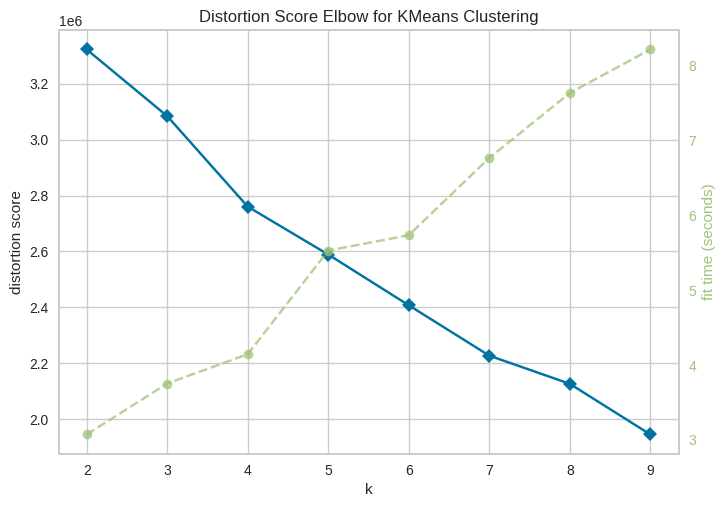

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(res_scaled)   
visualizer.show()

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 2, Silhouette Score: 0.762, Change from Previous Cluster: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 3, Silhouette Score: 0.106, Change from Previous Cluster: -0.656


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 4, Silhouette Score: 0.121, Change from Previous Cluster: 0.015


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 5, Silhouette Score: 0.127, Change from Previous Cluster: 0.006


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 6, Silhouette Score: 0.127, Change from Previous Cluster: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 7, Silhouette Score: 0.127, Change from Previous Cluster: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 8, Silhouette Score: 0.113, Change from Previous Cluster: -0.014


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 9, Silhouette Score: 0.112, Change from Previous Cluster: -0.001


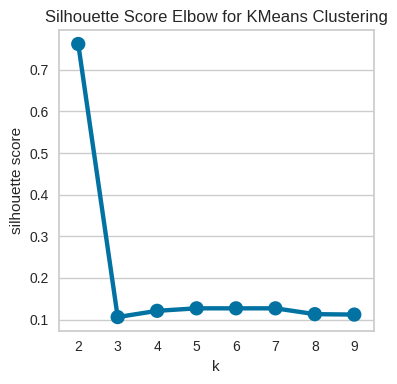

In [21]:
# Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, 
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()
            
optimal_kmeans(res_scaled, 2, 10) 

In [18]:
result3["score"]=userscore['score'] 

In [19]:
# Perform clustering analysis and obtain cluster labels
k = 3  # Number of clusters determined in Q1
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(res_scaled)

# Add cluster labels to the DataFrame
result3['cluster'] = clusters

# Calculate loyalty score statistics for each cluster
loyalty_stats = result3.groupby('cluster')['score'].describe()

# Print the loyalty score statistics for each cluster
loyalty_stats

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,77296.0,-0.376581,3.813563,-33.219281,-0.873975,-0.015858,0.770605,15.994455
1,19494.0,-0.447166,3.998550,-33.219281,-0.905852,-0.050589,0.753515,15.606405
2,83763.0,-0.391600,3.821572,-33.219281,-0.889973,-0.023761,0.762947,17.965068


In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(res_scaled)


In [ ]:

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0],y=X_tsne[:, 1],hue=clusters,palette='tab10')
# plt.colorbar()
plt.title('t-SNE Visualization with Categories')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 't-SNE Visualization with Categories')

Text(0.5, 0, 'Dimension 1')

Text(0, 0.5, 'Dimension 2')

<Axes: >

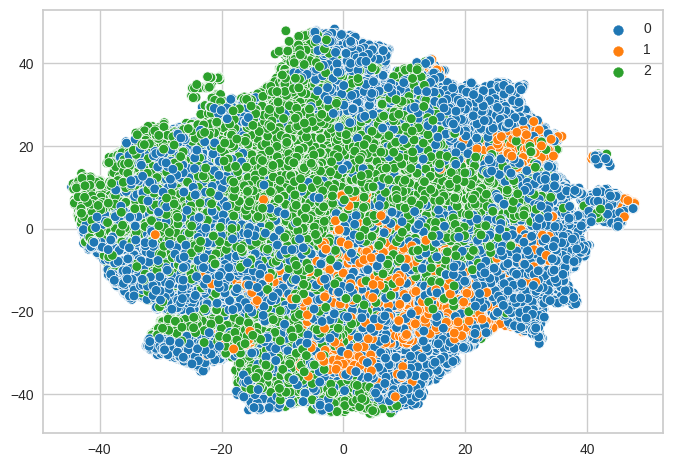

In [30]:
sns.scatterplot(x=X_tsne[:, 0],y=X_tsne[:, 1],hue=clusters,palette='tab10')

In [42]:
centers = kmeans.cluster_centers_

# Print the cluster centers
print(centers)

[[ 4.32630581e-01 -1.63102567e-01  4.36554170e-01 -4.53856742e-01
  -2.42392232e-03 -1.79325200e-01  6.20942735e-02  7.10088628e-01
   4.76844676e-01  3.20641798e-01  4.15186246e-01 -5.39167391e-02
   0.00000000e+00 -5.29877073e-02  0.00000000e+00 -4.82065735e-02
  -3.02195435e-03  3.58554087e-02 -2.55355291e-01 -4.11854346e-04
   2.20940775e-03 -1.77610206e-03]
 [-4.02317181e-01  1.51314482e-01 -4.02766908e-01  4.22802551e-01
   2.24780364e-03  1.65563005e-01 -5.83498257e-02 -6.58363950e-01
  -4.40012864e-01 -2.94561841e-01 -3.81756233e-01 -5.53019973e-02
   0.00000000e+00 -5.47276265e-02  0.00000000e+00 -5.01834827e-02
  -1.73490500e-03 -3.29884487e-02  2.40501321e-01 -1.71552873e-04
  -3.27286793e-03  1.89032763e-03]
 [ 5.90891994e-01 -1.82037802e-01  2.34202107e-01 -7.04367233e-01
  -2.59984556e-03 -1.09416710e-01  1.53434391e-01  7.46836734e-01
   2.64163777e-01  2.89867456e-02  7.60007757e-02  1.18599032e+01
   0.00000000e+00  1.16983880e+01  0.00000000e+00  1.06874210e+01
   5.1

Based on the provided statistics of loyalty scores for each cluster of users, here are the findings:

### Cluster 0:

- Count: 86,257 users
- Mean loyalty score: -0.395247
- Standard deviation: 3.876695
- Minimum loyalty score: -33.219281
- 25th percentile: -0.879162
- Median (50th percentile): -0.023896
- 75th percentile: 0.769707
- Maximum loyalty score: 15.994455
### Cluster 1:

- Count: 93,468 users
- Mean loyalty score: -0.387754
- Standard deviation: 3.804425
- Minimum loyalty score: -33.219281
- 25th percentile: -0.889601
- Median (50th percentile): -0.023425
- 75th percentile: 0.761433
- Maximum loyalty score: 17.965068
### Cluster 2:

- Count: 828 users
- Mean loyalty score: -0.352097
- Standard deviation: 3.481228
- Minimum loyalty score: -33.219281
- 25th percentile: -0.867491
- Median (50th percentile): -0.048714
- 75th percentile: 0.716082
- Maximum loyalty score: 6.393022

These statistics provide insights into the loyalty scores of users in each cluster. The mean loyalty scores for clusters 0, 1, and 2 are negative, indicating lower loyalty compared to the overall average. The standard deviations suggest varying levels of dispersion in loyalty scores within each cluster. The percentiles highlight the distribution of loyalty scores, with some users having relatively high loyalty scores while others have lower scores. Further analysis and interpretation may be required to understand the factors contributing to the loyalty scores within each cluster.

Q3 (30 points) Discuss whether you need to reduce the dimensions to improve clustering performance and build another clustering model (if you believe dimension reduction would help, you can apply it or choose another clustering method) to improve your analysis from Q1. You should explain why the resultant clusters are better than the ones you got in Q1.

Apply dimensionality reduction using PCA and use a different clustering algorithm, such as Gaussian Mixture Models (GMM), to improve the analysis from Q1

In [39]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
res_pca = pca.fit_transform(res_scaled)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

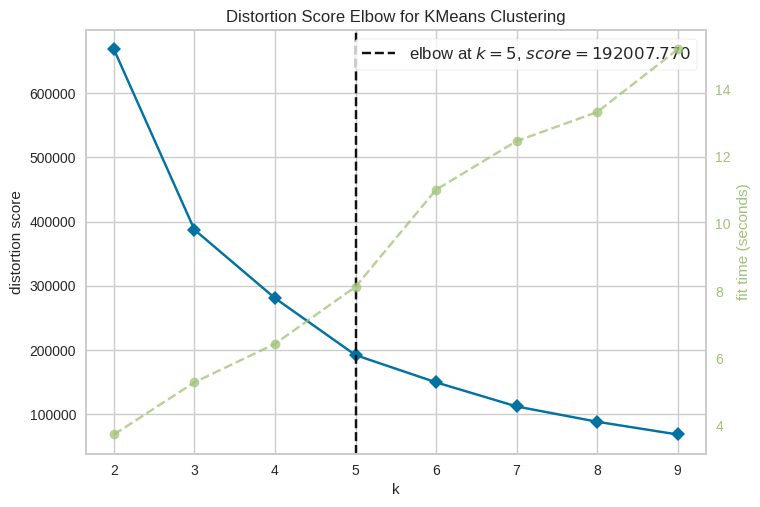

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# This approaches uses distortion score to evaluate KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(res_pca)   
visualizer.show()

In [40]:
from sklearn.mixture import GaussianMixture
# Build a new clustering model using Gaussian Mixture Models (GASM)
gasm = GaussianMixture(n_components=5)
gasm.fit(res_pca)
labels = gasm.predict(res_pca)

# Add the cluster labels to the original DataFrame
result3['cluster'] = labels

# Calculate statistics of loyalty scores for each cluster
loyalty_stats = result3.groupby('cluster')['score'].describe()

# Print the loyalty score statistics for each cluster
loyalty_stats

GaussianMixture(n_components=5)

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,28168.0,-0.410072,3.893872,-33.219281,-0.896373,-0.035387,0.767998,15.994455
1,31470.0,-0.366412,3.798668,-33.219281,-0.856798,-0.007702,0.775008,13.602322
2,639.0,-0.267453,3.139070,-33.219281,-0.831712,-0.025690,0.758914,6.393022
3,120044.0,-0.393563,3.837493,-33.219281,-0.889542,-0.024383,0.761839,17.965068
4,232.0,-0.556799,4.087116,-33.219281,-1.035703,-0.118404,0.596413,5.687771


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 't-SNE Visualization with Categories')

Text(0.5, 0, 'Dimension 1')

Text(0, 0.5, 'Dimension 2')

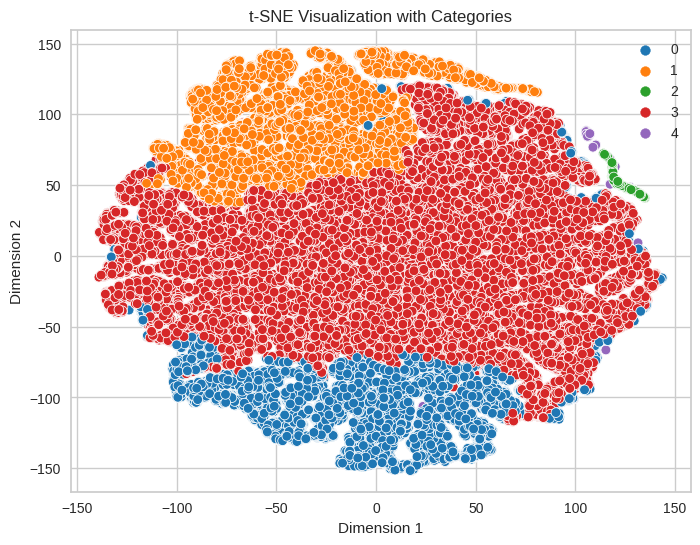

In [41]:

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(res_pca)# Plot the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0],y=X_tsne[:, 1],hue=labels,palette='tab10')
# plt.colorbar()
plt.title('t-SNE Visualization with Categories')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

By reducing the dimensions of the feature set using PCA, we transformed the data into a lower-dimensional space while preserving the most important information

We then applied GMM with n_components=5 to the reduced feature space. The resulting clusters were labeled as 0, 1, 2 ,3 and 4. Each cluster represents a distinct group of users based on their spending behaviors.


Q4 (5 points) Based on your results from Q3 report the statistics of loyalty scores for each cluster of users. Report your findings.

Based on the given statistics for each cluster, we can report the following findings regarding the loyalty scores for each cluster of users:

### Cluster 0:

- Count: 28,168
- Mean: -0.410072
- Standard Deviation: 3.893872
- Minimum: -33.219281
- 25th Percentile: -0.896373
- 50th Percentile (Median): -0.035387
- 75th Percentile: 0.767998
- Maximum: 15.994455
### Cluster 1:

- Count: 31,470
- Mean: -0.366412
- Standard Deviation: 3.798668
- Minimum: -33.219281
- 25th Percentile: -0.856798
- 50th Percentile (Median): -0.007702
- 75th Percentile: 0.775008
- Maximum: 13.602322

### Cluster 2:

- Count: 639
- Mean: -0.267453
- Standard Deviation: 3.139070
- Minimum: -33.219281
- 25th Percentile: -0.831712
- 50th Percentile (Median): -0.025690
- 75th Percentile: 0.758914
- Maximum: 6.393022

### Cluster 3:

- Count: 120,044
- Mean: -0.393563
- Standard Deviation: 3.837493
- Minimum: -33.219281
- 25th Percentile: -0.889542
- 50th Percentile (Median): -0.024383
- 75th Percentile: 0.761839
- Maximum: 17.965068

### Cluster 4:

- Count: 232
- Mean: -0.556799
- Standard Deviation: 4.087116
- Minimum: -33.219281
- 25th Percentile: -1.035703
- 50th Percentile (Median): -0.118404
- 75th Percentile: 0.596413
- Maximum: 5.687771

These statistics provide information about the loyalty scores distribution within each cluster. For example, we can observe the range of values from the minimum to the maximum loyalty score in each cluster. The mean indicates the average loyalty score, and the standard deviation gives a measure of the spread or dispersion of the scores within each cluster. The quartiles (25th, 50th, and 75th percentiles) provide insights into the central tendency and spread of the data.

### Frequent Pattern Mining¶
You can consider the mlxtend library1 or the spmf library2

Q5 (20 points) Use frequent pattern mining to find frequently co-occurring transaction types. Report your findings and justify how you pick the min support threshold.

In [3]:
historical_transactions = pd.read_csv('historical_transactions.csv')
new_merchant_transactions = pd.read_csv('new_merchant_transactions.csv')

In [3]:
# Concatenating the datasets vertically (along the rows)
transactions = pd.concat([historical_transactions, new_merchant_transactions], axis=0)

In [4]:
transactions["score"]=userscore['score'] 

In [38]:
transactions.shape

(31075392, 14)

In [43]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31075392 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.5+ GB


In [39]:
transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [5]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

# Extract the relevant columns and create a list of transactions
transactions_data = transactions[['merchant_category_id', 'installments']].astype(str).values.tolist()

# Encode the data using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions_data).transform(transactions_data)
encoded_data = pd.DataFrame(te_ary, columns=te.columns_)

# Perform frequent pattern mining using Apriori
frequent_itemsets = apriori(encoded_data, min_support=0.05, use_colnames=True)

# Sort the frequent itemsets by support in descending order
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Display the frequent itemsets
print(frequent_itemsets)

    support  itemsets
0  0.525625       (0)
1  0.402688       (1)
5  0.184161     (705)
8  0.111862  (705, 0)
3  0.104570     (307)
2  0.077951     (278)
9  0.069063  (1, 705)
6  0.066743      (80)
7  0.057341  (307, 0)
4  0.055499     (367)


Based on the frequent pattern mining results, we can report the following findings:

Transaction Type (Itemset) Frequencies:

- Itemset (0): Support = 0.525625
- Itemset (1): Support = 0.402688
- Itemset (705): Support = 0.184161
- Itemset (705, 0): Support = 0.111862
- Itemset (307): Support = 0.104570
- Itemset (278): Support = 0.077951
- Itemset (1, 705): Support = 0.069063
- Itemset (80): Support = 0.066743
- Itemset (307, 0): Support = 0.057341
- Itemset (367): Support = 0.055499
Frequently Co-occurring Transaction Types:
Based on the given results, we can identify several frequently co-occurring transaction types (itemsets):

- Itemset (705, 0) has a support of 0.111862, indicating that these two transaction types often occur together.
- Itemset (1, 705) has a support of 0.069063, suggesting a frequent co-occurrence of transaction types 1 and 705.
Justification of Minimum Support Threshold:
The minimum support threshold determines the minimum frequency at which itemsets are considered frequent. The selection of the minimum support threshold depends on the specific dataset and the desired balance between capturing meaningful co-occurring patterns and managing computational complexity.

In [27]:
pip install mlxtend

  Using cached mlxtend-0.22.0-py2.py3-none-any.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Split users based on their loyalty scores
high_loyalty_users = transactions[transactions['score'] > 0]
low_loyalty_users = transactions[transactions['score'] <= 0]

In [7]:
# Extract relevant columns for frequent pattern mining
columns = ['merchant_category_id', 'installments']  # category_1 is not exist in high_loyalty_users
high_loyalty_transactions = high_loyalty_users[columns].astype(str).values.tolist()
low_loyalty_transactions = low_loyalty_users[columns].astype(str).values.tolist()

In [8]:
# Perform frequent pattern mining for high loyalty users
te_high = TransactionEncoder()
te_ary_high = te_high.fit(high_loyalty_transactions).transform(high_loyalty_transactions)
high_loyalty_encoded = pd.DataFrame(te_ary_high, columns=te_high.columns_)
frequent_patterns_high = apriori(high_loyalty_encoded, min_support=0.1, use_colnames=True)

# Perform frequent pattern mining for low loyalty users
te_low = TransactionEncoder()
te_ary_low = te_low.fit(low_loyalty_transactions).transform(low_loyalty_transactions)
low_loyalty_encoded = pd.DataFrame(te_ary_low, columns=te_low.columns_)
frequent_patterns_low = apriori(low_loyalty_encoded, min_support=0.1, use_colnames=True)

In [9]:
# Print the frequent patterns for high loyalty users
print("Frequent Patterns for High Loyalty Users:")
print(frequent_patterns_high)

# Print the frequent patterns for low loyalty users
print("Frequent Patterns for Low Loyalty Users:")
print(frequent_patterns_low)

Frequent Patterns for High Loyalty Users:
    support itemsets
0  0.532159      (0)
1  0.406248      (1)
2  0.100990    (278)
3  0.109191    (307)
4  0.129916    (705)
Frequent Patterns for Low Loyalty Users:
    support itemsets
0  0.529571      (0)
1  0.408871      (1)
2  0.100985    (278)
3  0.107547    (307)
4  0.129161    (705)


Based on the frequent pattern mining results for high and low loyalty users, we can report the following findings:

Frequent Patterns for High Loyalty Users:

- Itemset (0): Support = 0.532159
- Itemset (1): Support = 0.406248
- Itemset (278): Support = 0.100990
- Itemset (307): Support = 0.109191
- Itemset (705): Support = 0.129916

Frequent Patterns for Low Loyalty Users:

- Itemset (0): Support = 0.529571
- Itemset (1): Support = 0.408871
- Itemset (278): Support = 0.100985
- Itemset (307): Support = 0.107547
- Itemset (705): Support = 0.129161
Findings:
The frequent pattern mining results show the frequent co-occurring transaction types (itemsets) for high and low loyalty users separately.

For both high and low loyalty users, the most frequent transaction types are (0) and (1), which occur more often compared to other transaction types.

Interestingly, the frequent patterns for high and low loyalty users are quite similar, suggesting that there may not be significant differences in the co-occurring transaction types between these two groups.

Itemsets (278), (307), and (705) also appear frequently for both high and low loyalty users, indicating that these transaction types tend to co-occur regardless of loyalty score.

Overall, these findings suggest that there are common frequent patterns among users with different loyalty scores, indicating similar transaction behaviors or preferences. However, further analysis and interpretation, such as association rule mining or domain-specific insights, may be needed to gain a deeper understanding of the relationships between these transaction types and loyalty scores